In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from astropy.io import fits
from matplotlib import cm

In [3]:
with open('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/wyle0112-hS_N_.txt','r') as data :
    sample = data.read()
    
data.close()

In [4]:
drpall_list = fits.open("/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/platelist-v2_4_3.fits")

In [4]:
table_data = StringIO(sample)

In [5]:
# convert txt to csv and make dataframe
df = pd.read_csv(table_data, sep=',')

In [6]:
df

,mangaid,ra,dec,nsa_z,frac_spx,flag1,flag2
0,1-113521,317.38870,11.502920,0.135043,0.084025,False,0
1,1-113675,318.77560,10.098460,0.129881,0.146067,False,0
2,1-121532,118.09110,34.326570,0.139965,0.368421,True,4
3,1-121737,118.29130,35.932520,0.113369,1.055877,False,0
4,1-149270,168.30090,50.264590,0.115761,0.997324,False,0
5,1-156039,143.94070,49.023210,0.114699,1.033171,False,0
6,1-156158,144.47600,50.989100,0.138619,0.157040,False,0
7,1-167519,153.91470,44.656870,0.112397,0.644802,False,0
8,1-173904,166.15800,49.675790,0.114195,1.051478,False,0
9,1-180298,322.25310,0.182614,0.133437,0.005000,False,0


In [7]:
mangaid = np.array(df[[df.columns[0]]])

In [8]:
mangaid.flatten();
len(mangaid)

45

In [9]:
objlist = drpall_list[2].data

In [10]:
# Compare mangaid to from drp with sample list to get plateifu 

plateifu = {}
lst = []
for i in range(len(objlist)):
    if objlist[i][3] in mangaid:
        if objlist[i][3] in plateifu:
            plateifu[objlist[i][3]].append(objlist[i][2])
        else:
            plateifu[objlist[i][3]] = [objlist[i][2]]

In [11]:
plateifu['1-43214']

# And there are no more duplicates --> What a win !

['8135-1902']

#### To read the flux density and plot the graph

In [12]:
def fluxReader(plateifu_id):
    data = filename(plateifu_id)
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))
    wave = data['WAVE'].data
    return (flux, wave)

In [13]:
def sumflux_calc(flux):
    n = len(flux)
    sumflux = np.zeros(4563)
    
    for i in range(n):
        for j in range(n):
            sumflux = np.add(sumflux, flux[i,j])
    return sumflux

In [14]:
def fluxGenerator(plateifu_id, mangaid, z):
    flux, wave = fluxReader(plateifu_id)
#     wave = fluxReader(plateifu_id)[1]
    wave_emit = wave/(1+z)
#     n = len(flux[0])
#     sumflux = np.zeros(4563)
    
#     for i in range(n):
#         for j in range(n):
#             sumflux = np.add(sumflux, flux[i,j])
    sumflux = sumflux_calc(flux)
            
    plt.figure(figsize = (16,5))
    plt.grid()
    plt.xlabel('Observed Wavelength ' + r'($\AA$)')
    plt.ylabel('Flux Density (1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$)')
    plt.ylim(0,700)
    plt.xlim(4800, 5800)
    plt.axvline(5007, color = 'mediumseagreen', linewidth = 2, label = '5007')
    plt.axvline(4959, color = 'deepskyblue', linewidth = 2, label = '4959')
    plt.legend()
    plt.title('MaNGA ID = ' + mangaid)
    plt.plot(wave, sumflux, color = 'darkmagenta')
    plt.show()
    
    plt.figure(figsize = (16,5))
    plt.grid()
    plt.xlabel('Emitted Wavelength ' + r'($\AA$)')
    plt.ylabel('(Observed) Flux Density (1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$)')
    plt.ylim(0,700)
    plt.xlim(4800, 5800)
    plt.axvline(5007, color = 'mediumseagreen', linewidth = 2, label = '5007')
    plt.axvline(4959, color = 'deepskyblue', linewidth = 2, label = '4959')
    plt.legend()
    plt.title('MaNGA ID = ' + mangaid)
    plt.plot(wave_emit, sumflux, color = 'tomato')
    plt.show()

#### To read all data and plot 2d images

In [15]:
def filename(plateifu_id):
    objname = 'manga-'+plateifu_id+'-LOGCUBE.fits.gz'
    name = '/Volumes/WD_External/MaNGA_Sample_with_[OIII]/'+ objname
    filedata = fits.open(name)
    return filedata

In [16]:
def dataReader(plateifu_id):
    data = filename(plateifu_id)
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))
    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    wave = data['WAVE'].data
    flux_header  = data['FLUX'].header
    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))
    return (flux, mask, wave, flux_header, ivar)

In [17]:
def imageGenerator(plateifu_id, mangaID, redshift):
    flux, mask, wave, flux_header, ivar = dataReader(plateifu_id)
#     mask = dataReader(plateifu_id)[1]
#     wave = dataReader(plateifu_id)[2]
#     flux_header = dataReader(plateifu_id)[3]
    
    x_center = int(flux_header['CRPIX1']) - 1
    y_center = int(flux_header['CRPIX2']) - 1

    do_not_use = (mask & 2**10) != 0
    flux_m = np.ma.array(flux, mask=do_not_use)

    ind_wave = np.where((wave / (1 + redshift) > 4900) & (wave / (1 + redshift) < 5100))[0]
    halpha = flux_m[:, :, ind_wave].sum(axis=2)
    im = halpha.T

    # Convert from array indices to arcsec relative to IFU center
    dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
    dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

    dimension = [0, len(flux[0]), 0, len(flux)]
    
    plt.figure(figsize = (5,5))
    plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    plt.title('MaNGA ID = ' + mangaID)
    plt.colorbar(label = '1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$')
    plt.plot()
#     plt.savefig('Images/demo_2d_13')

#### To calculate the BH mass

In [18]:
def wavelengthRange_and_compareArray(flux, ivar, start, end, wave):
    wavelength = np.where(np.logical_and(wave > start, wave < end))[0]
    
    flux_compare = []
    ivar_compare = []
    
    for i in wavelength:
#         print(i)
        flux_compare.append(flux[:,:,i].flatten())
        ivar_compare.append(ivar[:,:,i].flatten())
    
    return (flux_compare, ivar_compare, wavelength)

In [19]:
def comparer(flux_compare, ivar_compare, wavelength, flux):
    result = np.array([])
    sumresult = np.array([])
    
    for i in range(len(wavelength)):
        for j in range(len(flux)**2):
#             print(i,j)
            sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
            
            if flux_compare[i][j] < (3 * sigma):
                result = np.append(result, 0)
            else:
                result = np.append(result, flux_compare[i][j])
                
        sumresult = np.append(sumresult, np.sum(result))
        result = np.array([])
#     print(sumresult)
        
    return sumresult

In [20]:
def sigma_grapher(sumflux, wave, wavelength, sumresult):
    plt.figure(figsize = (14,8))
    plt.grid()
    plt.plot(wave[wavelength[0] : wavelength[-1] + 1], sumflux[wavelength[0] : wavelength[-1] + 1],
             label = 'Original flux density', color = 'blue')
    plt.plot(wave[wavelength[0] : wavelength[-1] + 1], sumresult, label = '3*r$\sigma$ subtracted',color ='coral')
    plt.xlabel('Observed Wavelength '+ r'$[\AA]$')
    plt.ylabel('Flux Density '+'[1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.legend()

In [21]:
def dlmbd(wave, wavelength, sumresult):
    dlambda = np.array([])
    for i in range(wavelength[1], wavelength[-1] + 1):
        dlambda = np.append(dlambda, wave[i] - wave[i-1])
    
    flmd_dlmd = np.sum(sumresult[0:-1] * dlambda)
    return flmd_dlmd

In [22]:
# Define the constants
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

In [23]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, flmd_dlmd):
    return 4 * np.pi * (luminosity_distance**2) * flmd_dlmd * (1e-17)

def BH_calc(luminosity):
    BHM = (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))
    print('M_BH / M_sol =', BHM)
    print('log(luminosity) =',np.log10(luminosity), 'erg/s')
    print('log(M_BH / M_sol) =', np.log10(BHM))

#### Testing it with object 32

redshift = 0.117997
CPU times: user 5.75 s, sys: 40.3 ms, total: 5.79 s
Wall time: 6.29 s


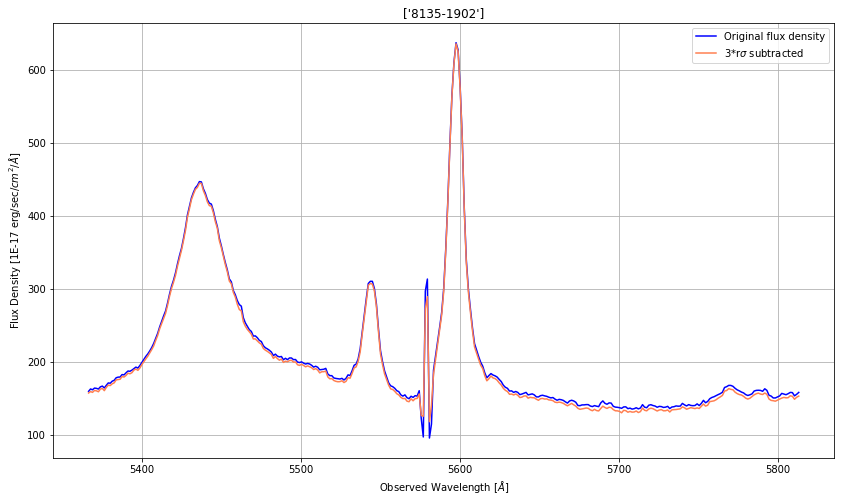

In [24]:
%%time

num = 32
redshift = df.loc[[num]]['nsa_z'][num]
start = 4800*(1+redshift)
end = 5200*(1+redshift)

flux, mask, wave, flux_header, ivar = dataReader(plateifu[df.loc[[num]]['mangaid'][num]][0])

flux_compare, ivar_compare, wavelength = wavelengthRange_and_compareArray(flux, ivar, start, end, wave)

sumresult = comparer(flux_compare, ivar_compare, wavelength, flux)

sumflux = sumflux_calc(flux)

sigma_grapher(sumflux, wave, wavelength, sumresult)

flmd_dlmd = dlmbd(wave, wavelength, sumresult)

plt.title(plateifu[df.loc[[num]]['mangaid'][num]])
print('redshift =',redshift)

In [25]:
%%time

Mpc = 549.6 # I got this from the other calculator

luminosity_distance = Mpc_to_cm(Mpc)

luminosity = luminosity_calc(luminosity_distance, flmd_dlmd)

BH_calc(luminosity)

M_BH / M_sol = 829806334.3315114
log(luminosity) = 43.51470989098931 erg/s
log(M_BH / M_sol) = 8.918976745695078
CPU times: user 153 µs, sys: 37 µs, total: 190 µs
Wall time: 176 µs


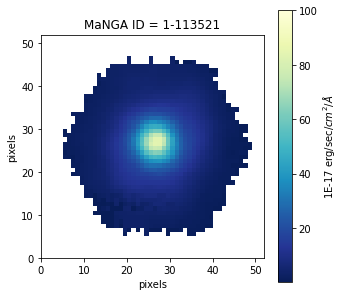

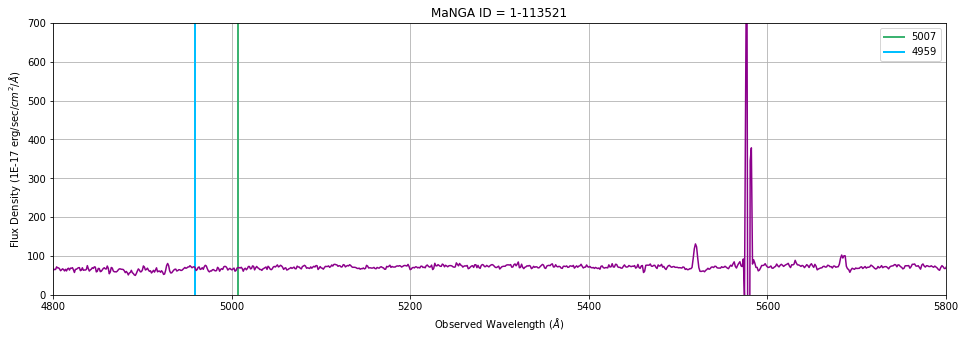

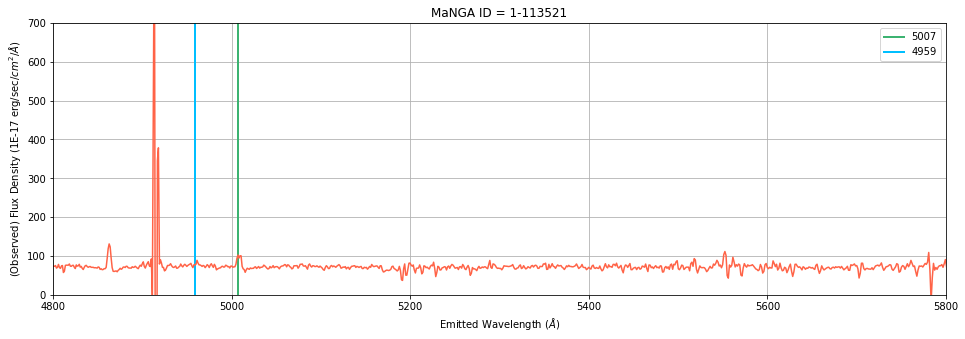

CPU times: user 5.05 s, sys: 452 ms, total: 5.5 s
Wall time: 5.25 s


In [26]:
%%time
num = 0
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

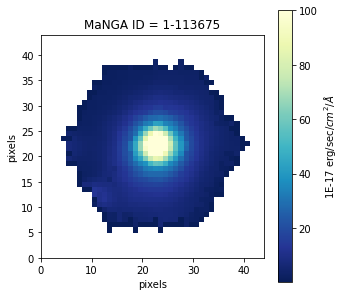

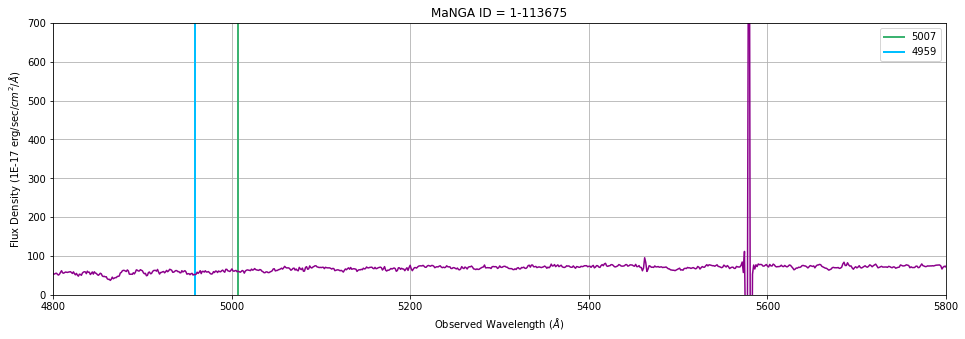

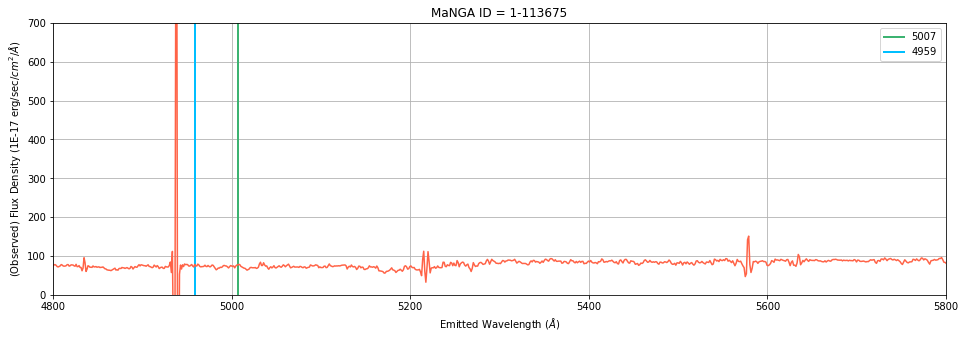

In [27]:
num = 1
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

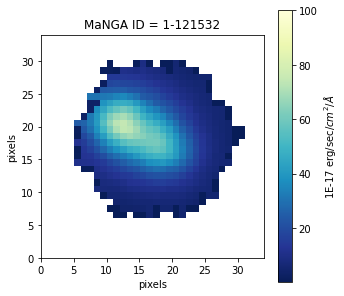

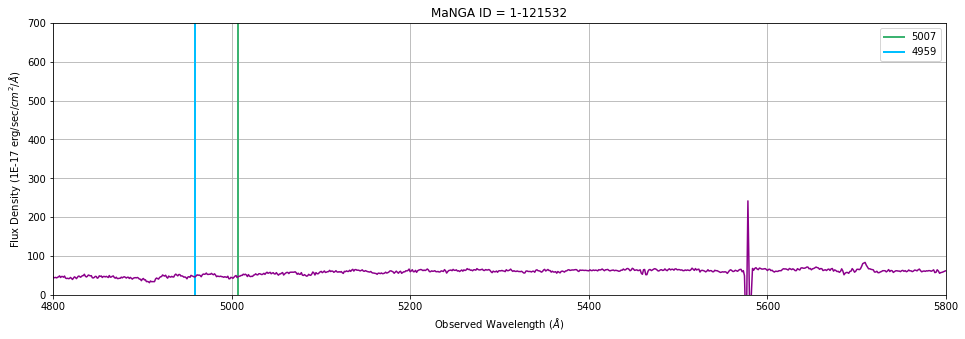

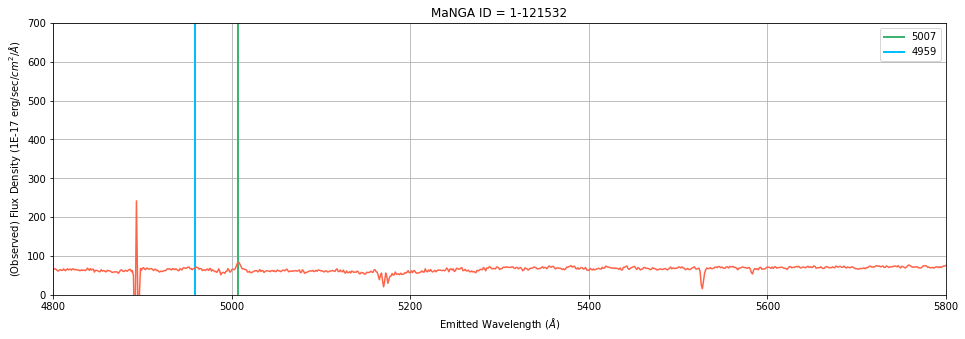

In [28]:
num = 2
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [29]:
# > 1 objects 
# num = 3
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

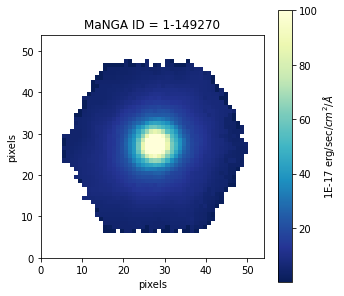

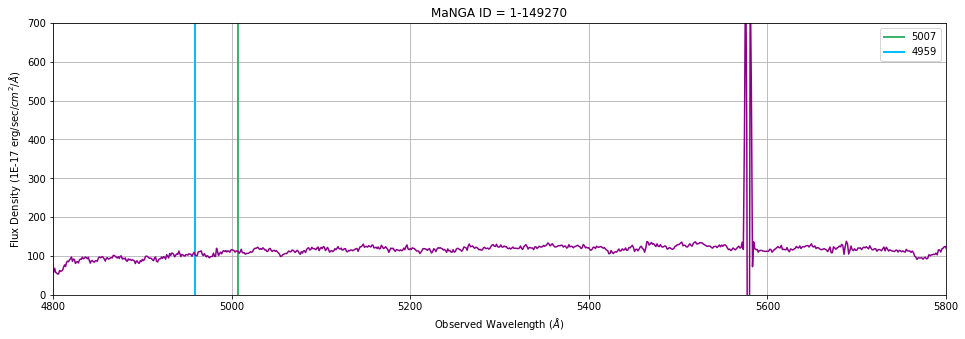

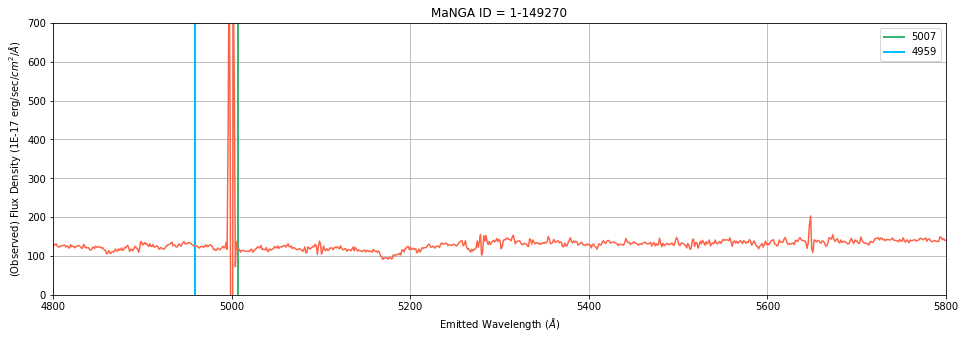

In [30]:
num = 4
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

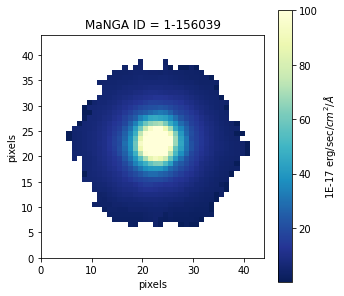

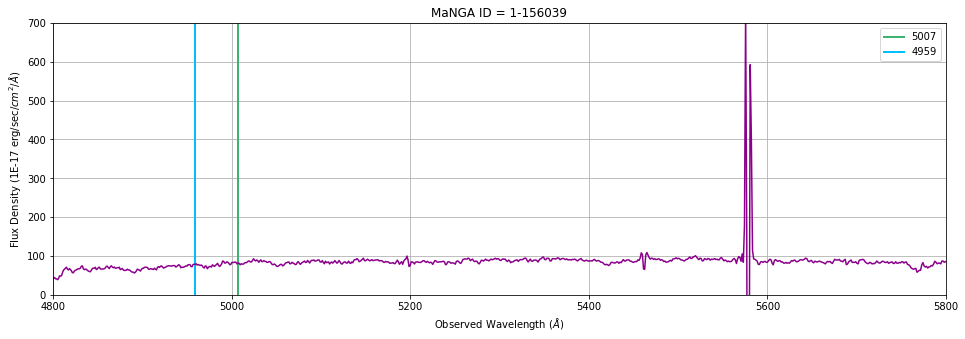

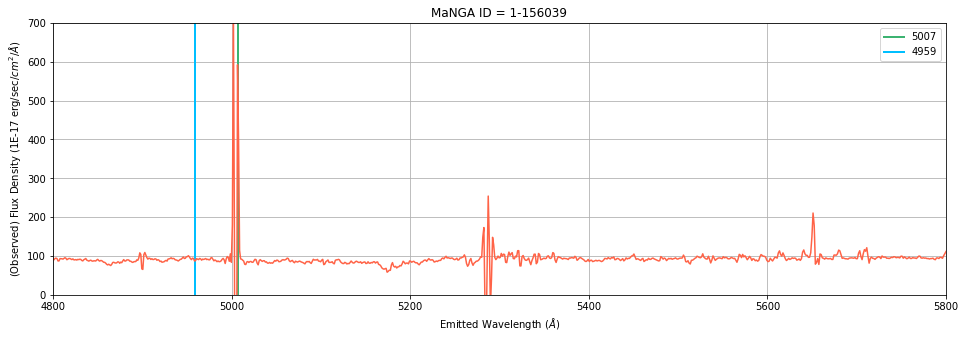

In [31]:
num = 5
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

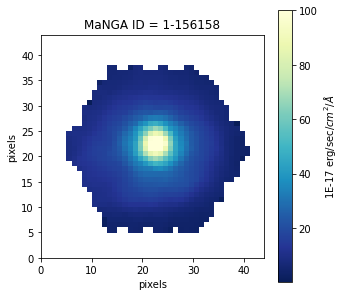

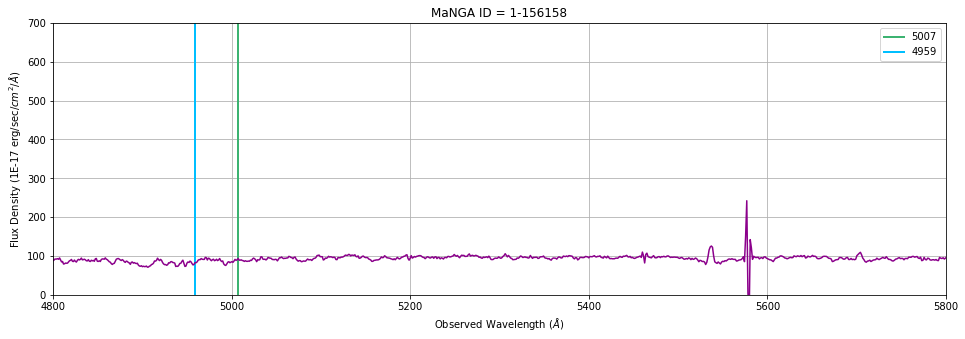

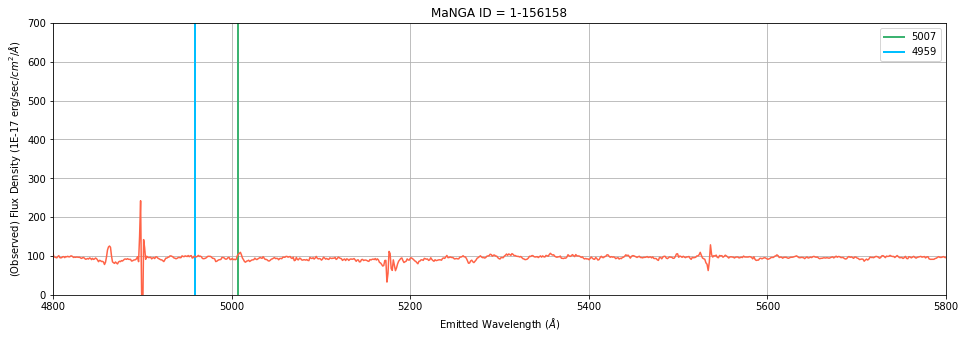

In [32]:
num = 6
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

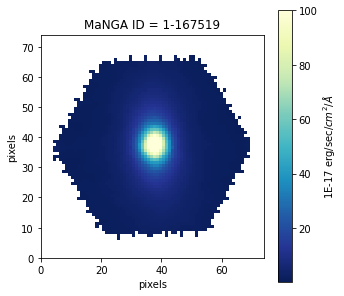

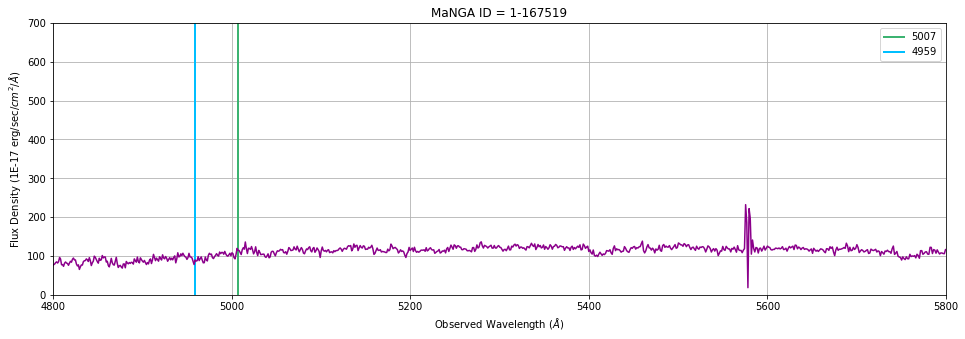

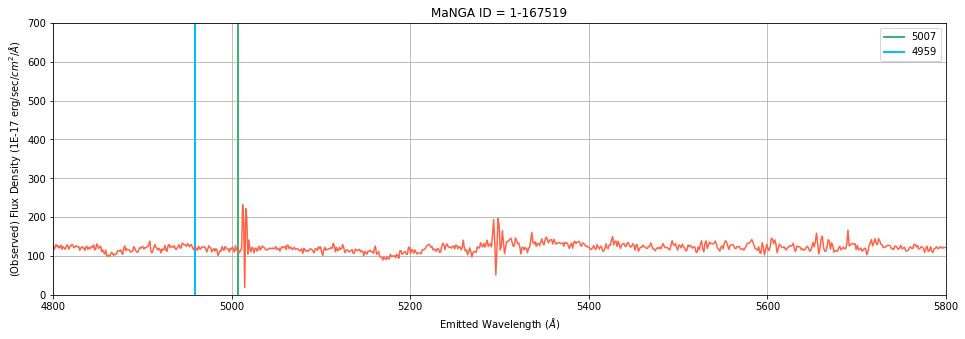

In [33]:
num = 7
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

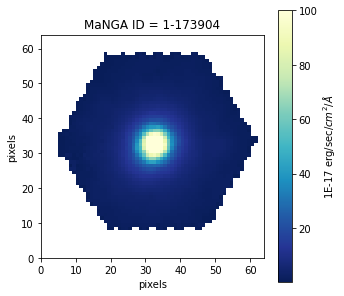

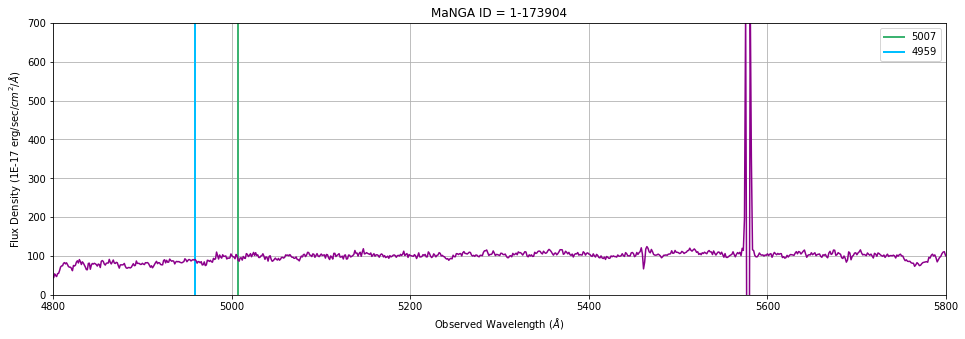

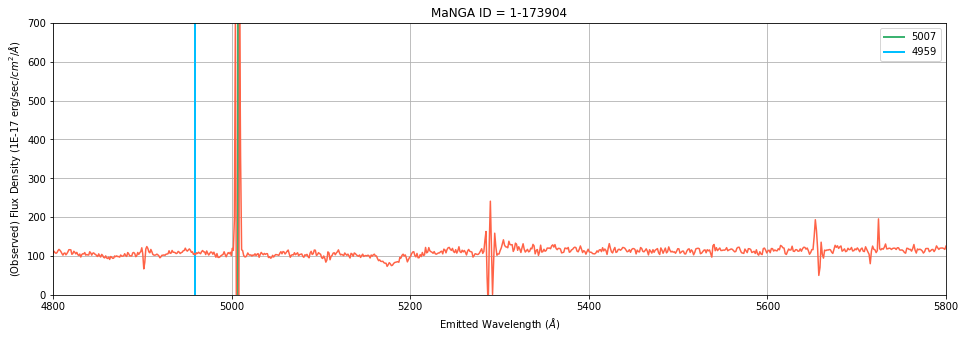

In [34]:
num = 8
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [35]:
#  > 1 objects
# num = 9
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

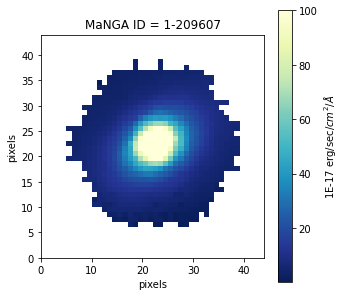

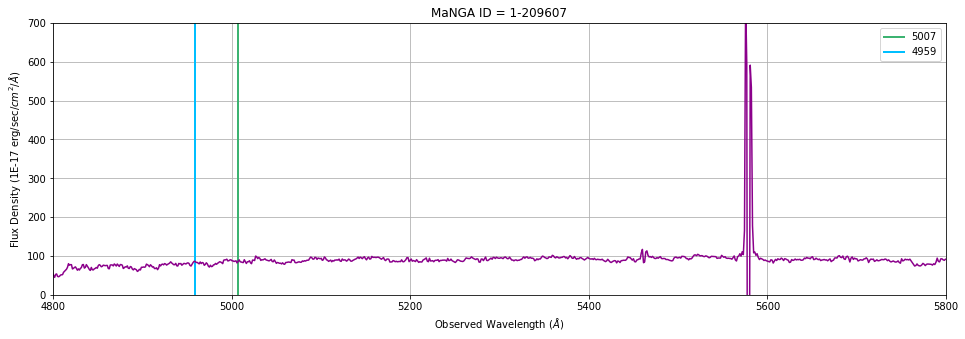

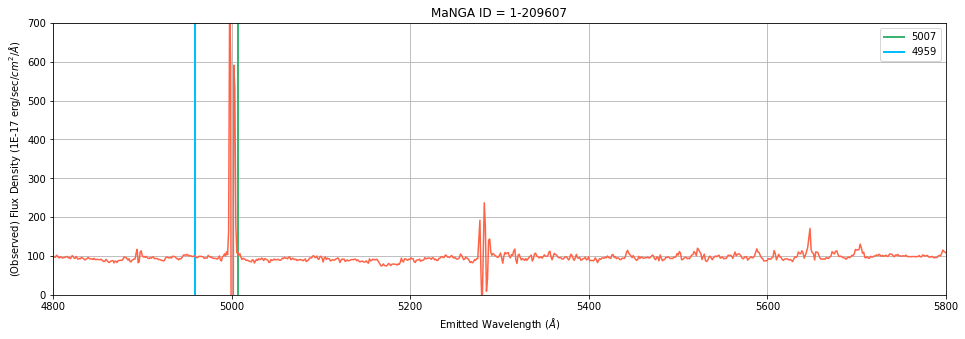

In [36]:
num = 10
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [37]:
#  > 1 objects
# num = 11
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

In [38]:
#  > 1 objects
# num = 12
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

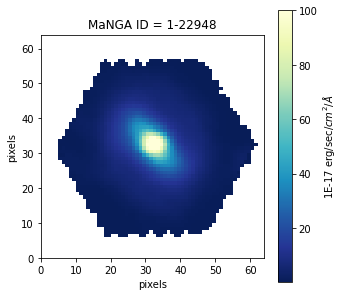

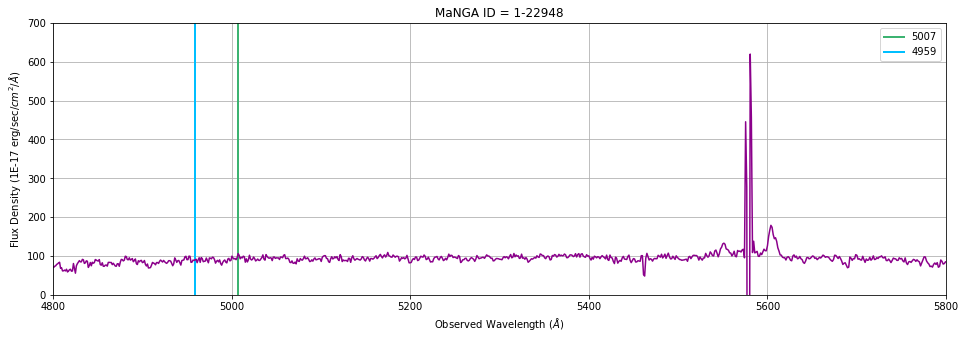

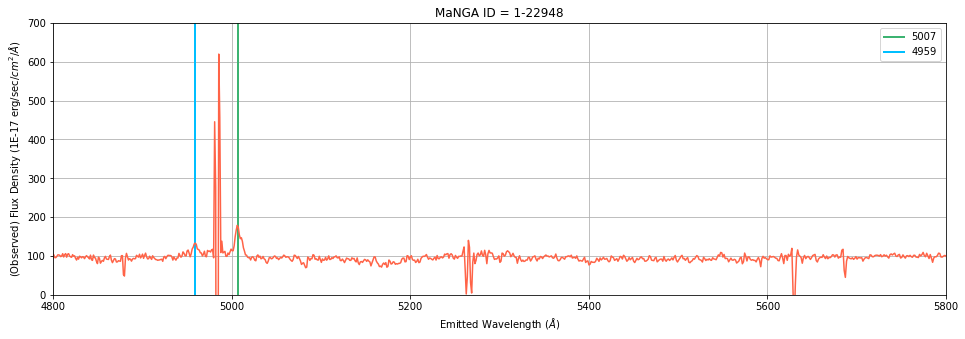

In [39]:
num = 13
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

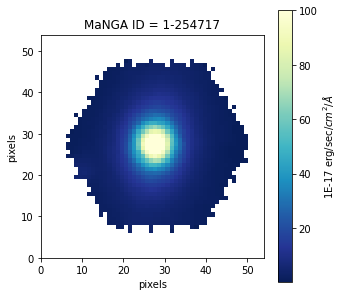

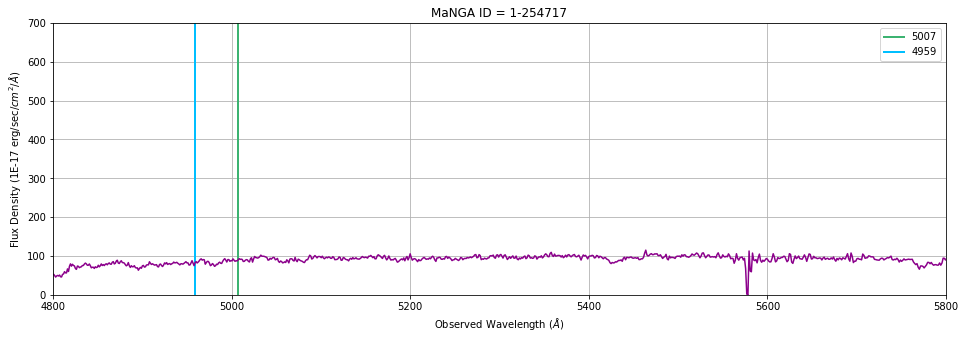

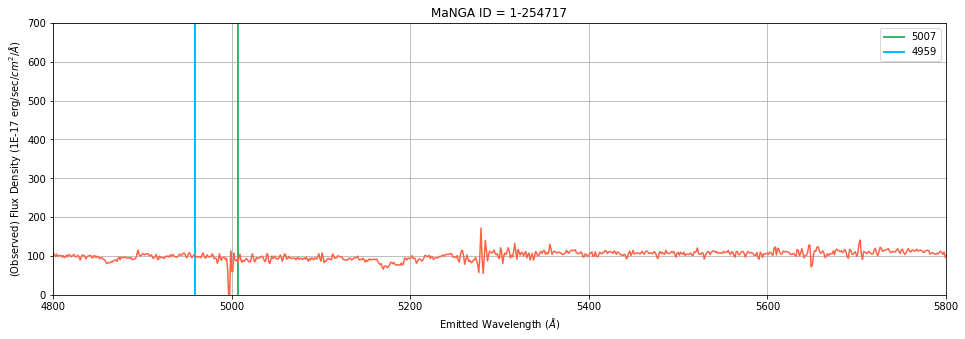

In [40]:
num = 14
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

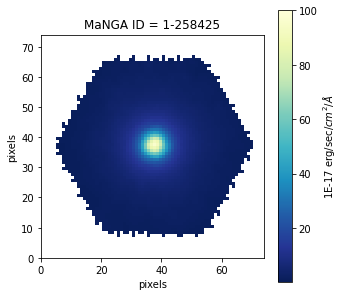

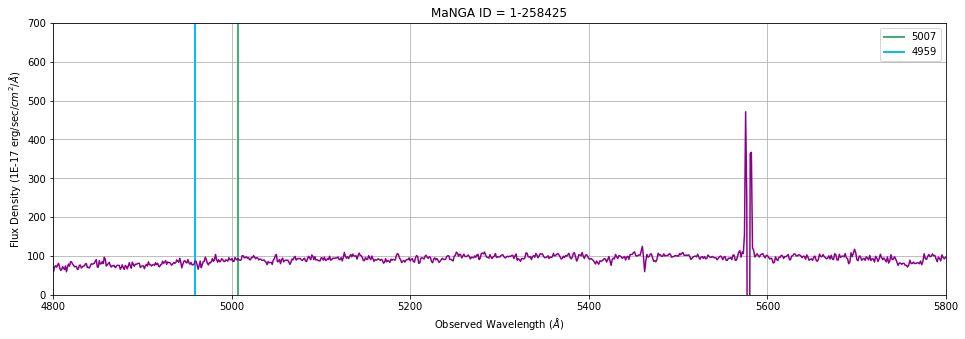

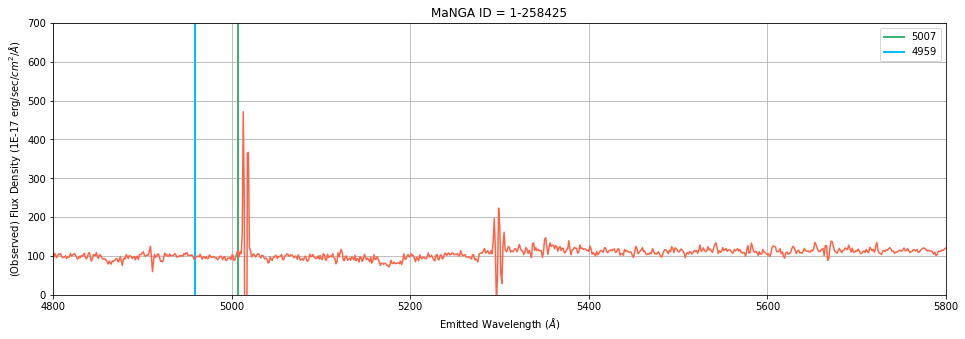

In [41]:
num = 15
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

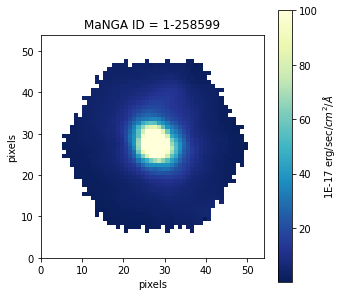

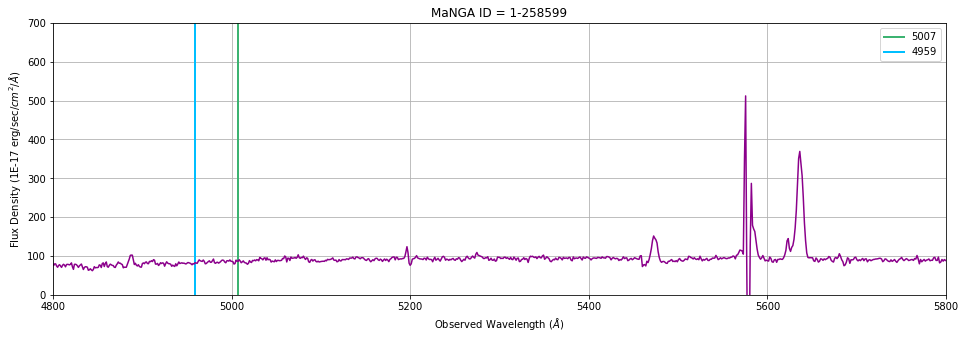

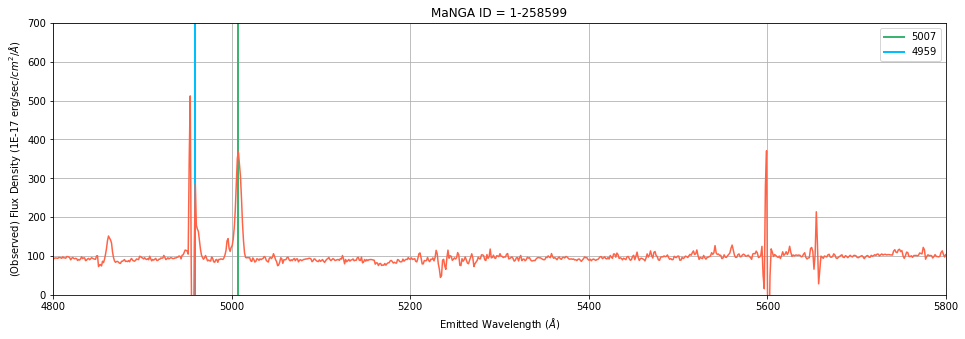

In [42]:
num = 16
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [43]:
# > 1 objects 
# num = 17
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

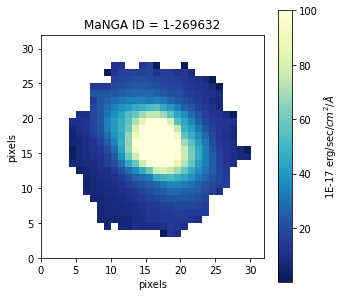

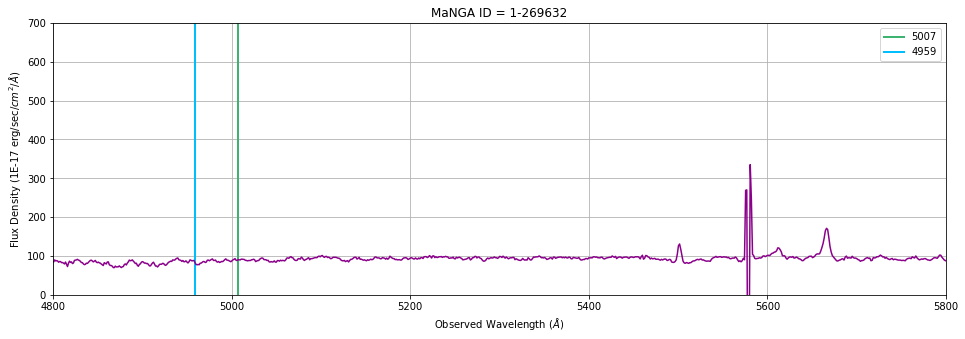

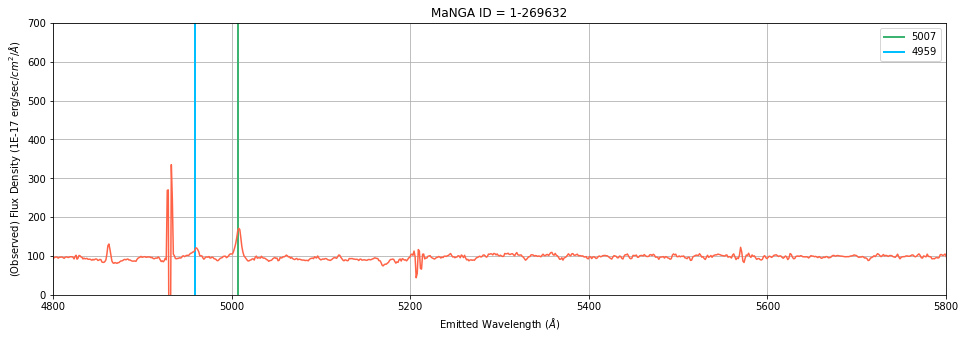

In [44]:
num = 18
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

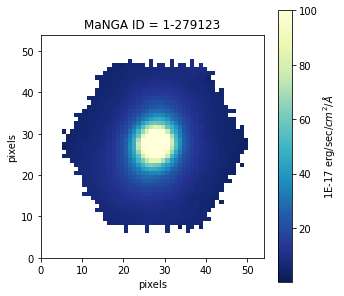

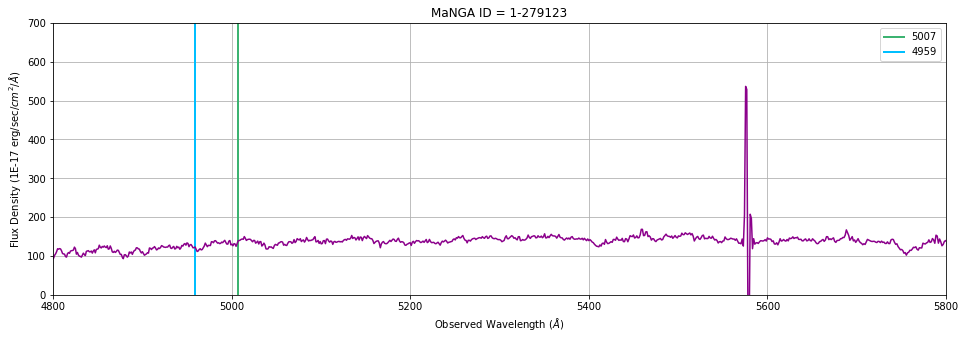

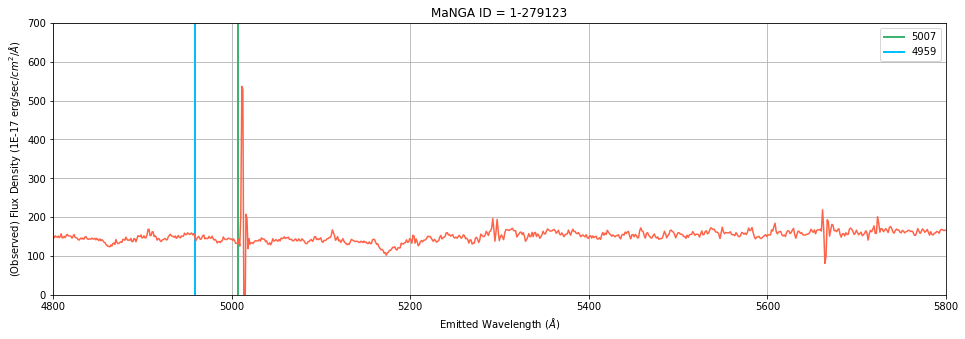

In [45]:
num = 19
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [46]:
# > 1 objects
# num = 20
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

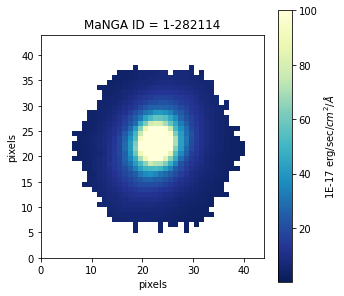

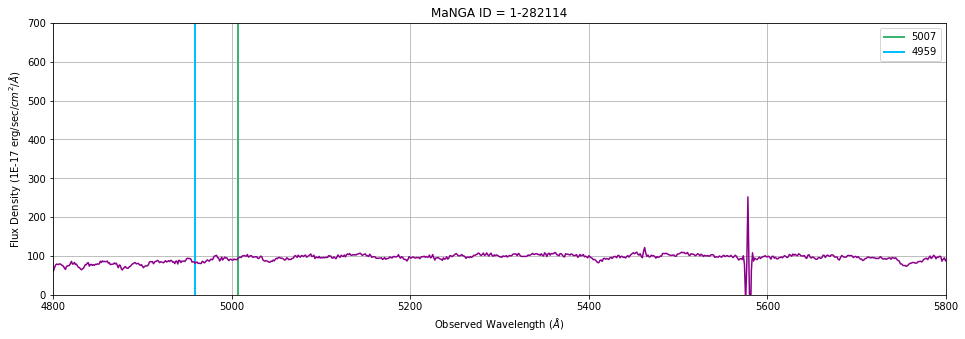

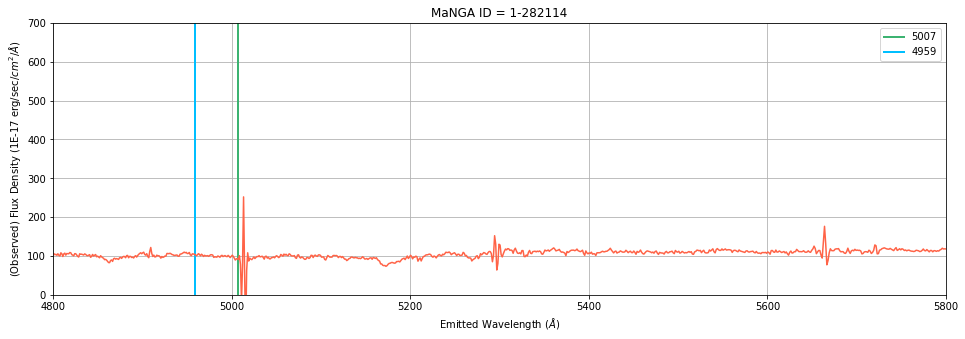

In [47]:
num = 21
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

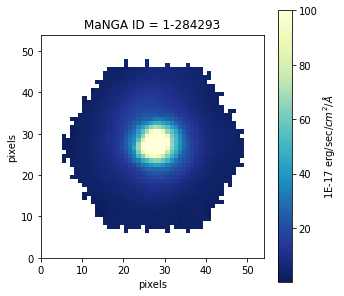

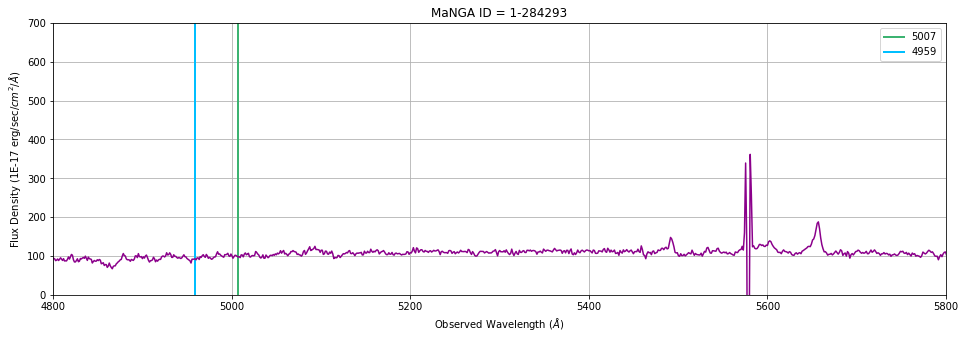

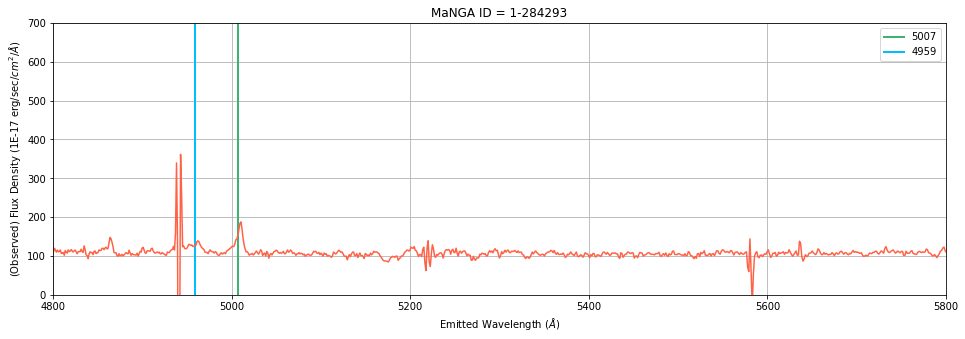

In [48]:
num = 22
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [49]:
# > 1 objects 
# num = 23
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

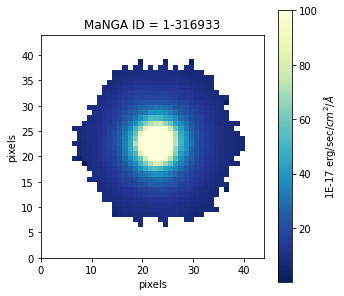

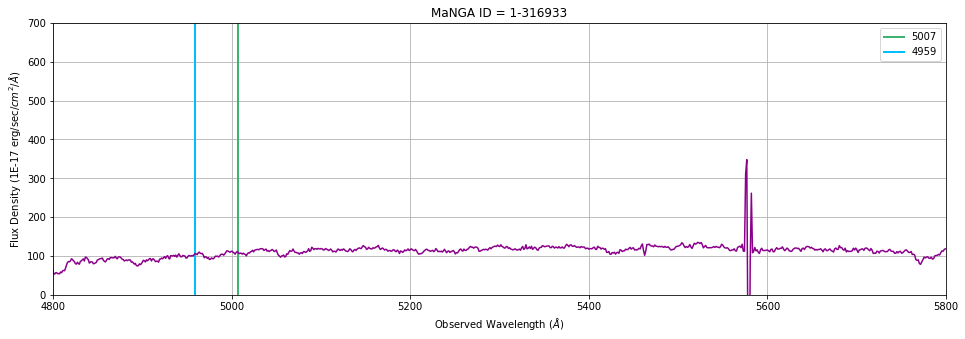

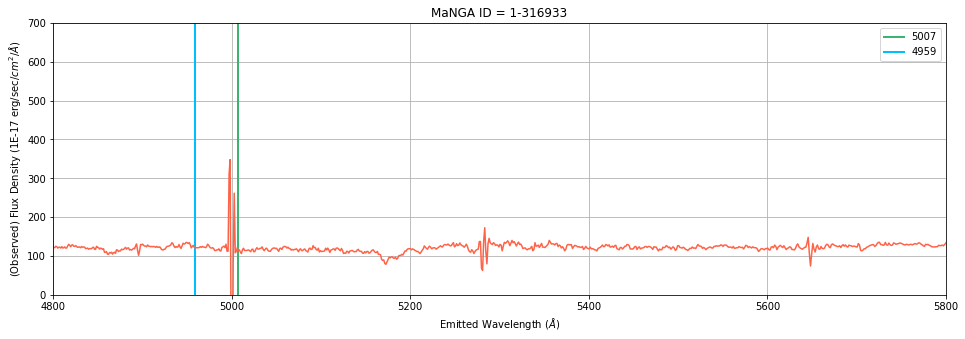

In [50]:
num = 24
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

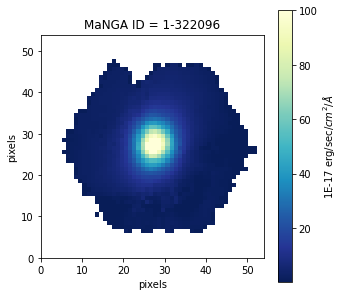

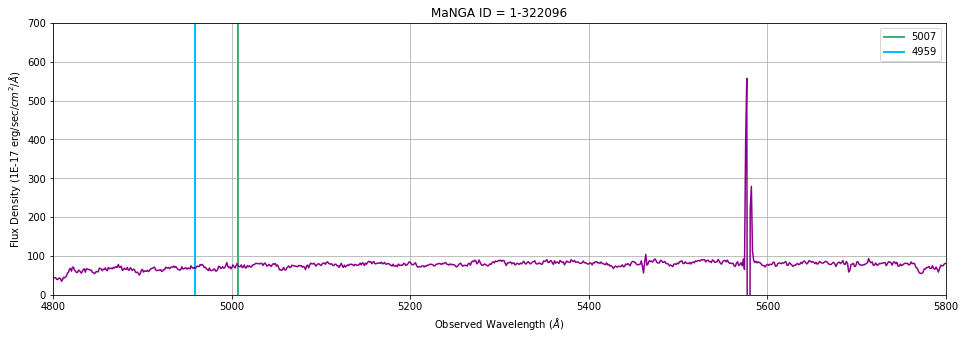

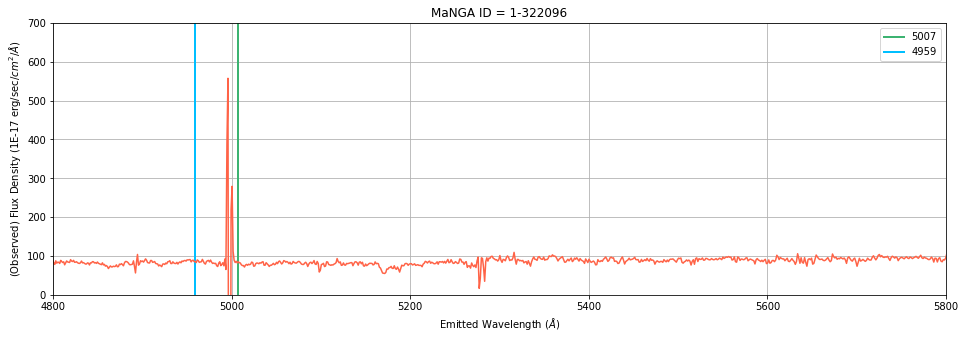

In [51]:
num = 25
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

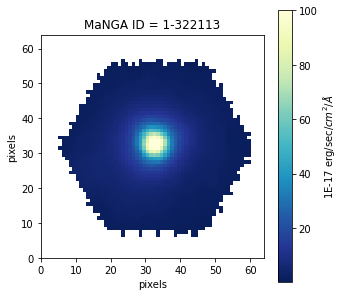

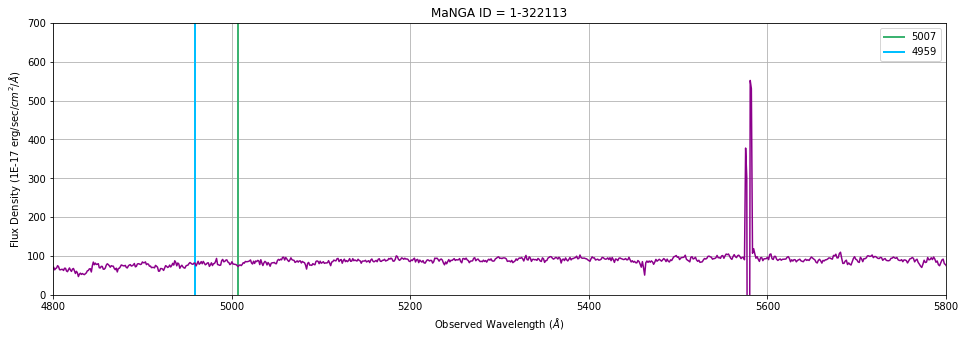

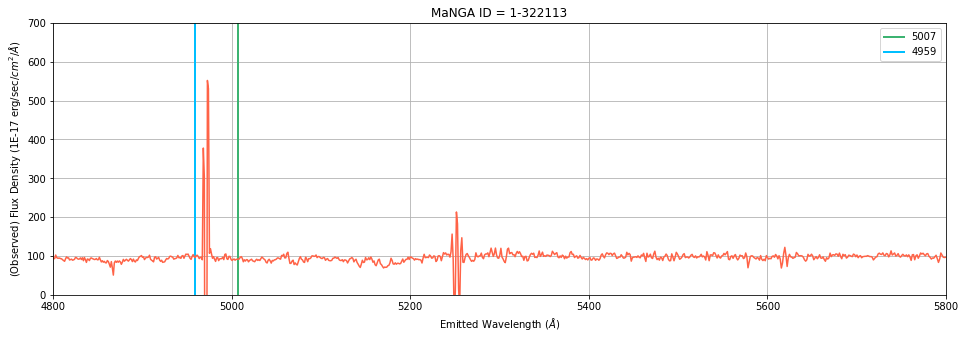

In [52]:
num = 26
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [53]:
# > 1 objects 
# num = 27
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

In [54]:
# > 1 objects 
# num = 28
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

In [55]:
# > 1 objects
# num = 29
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

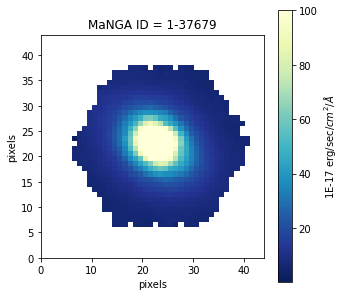

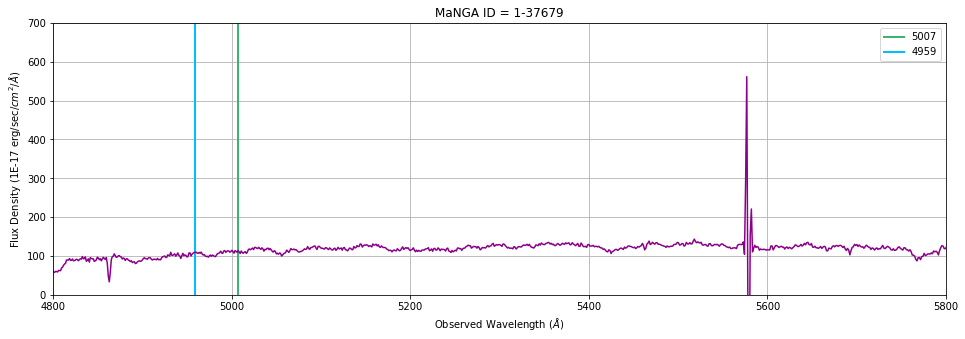

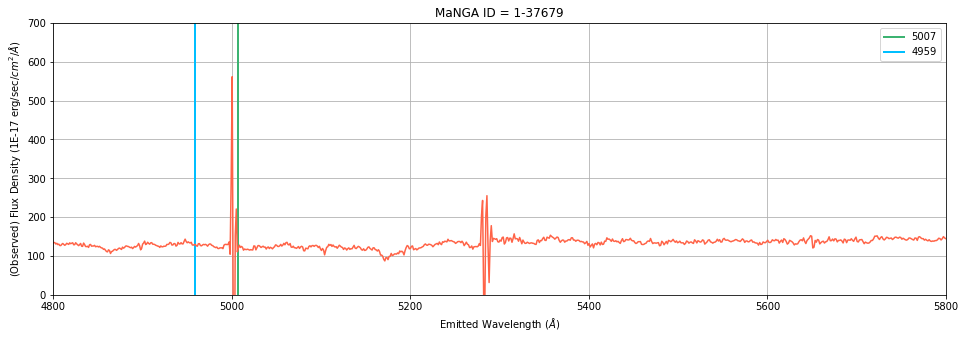

In [56]:
num = 30
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

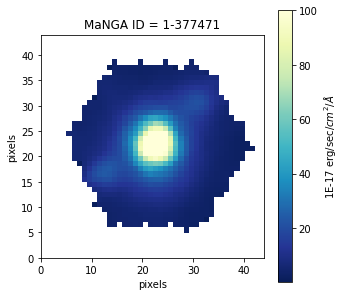

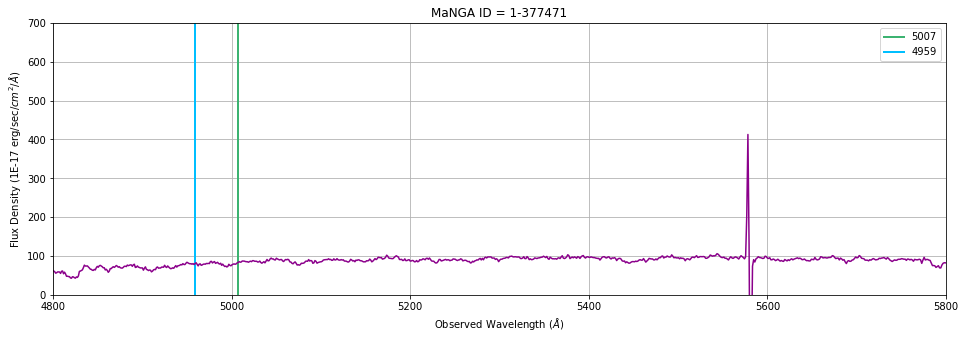

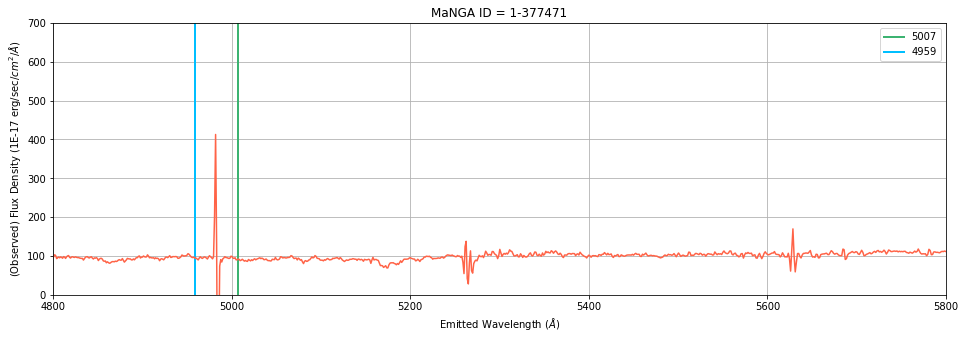

In [57]:
# This one looks weird
num = 31
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

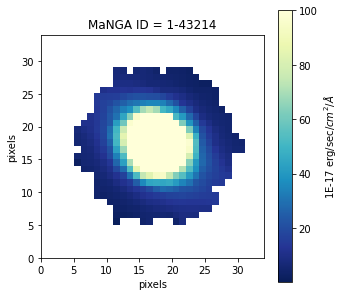

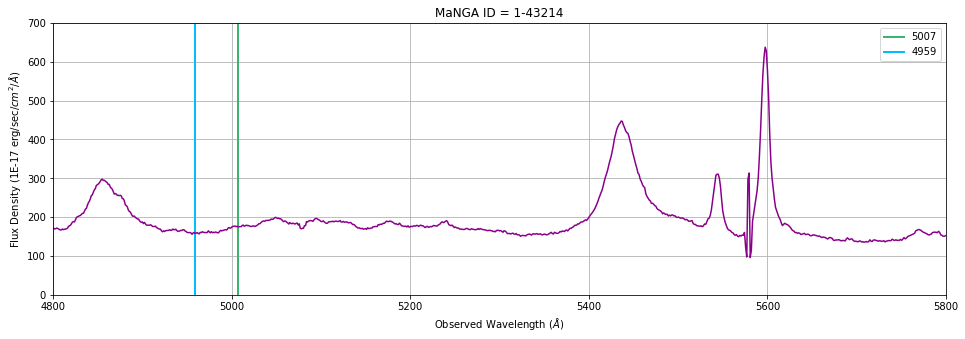

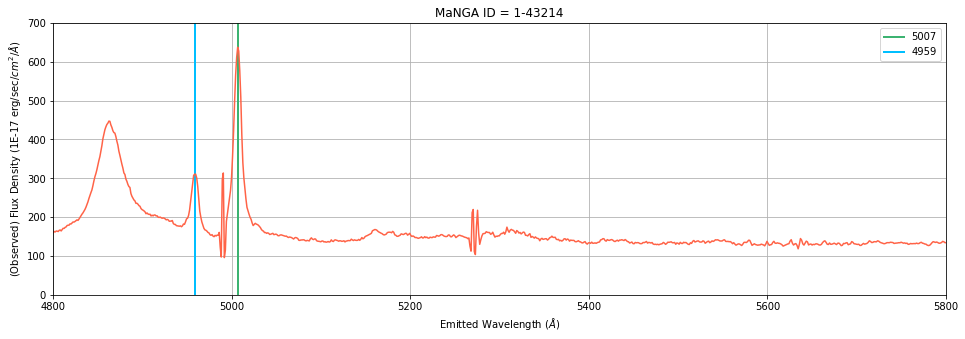

In [58]:
num = 32
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

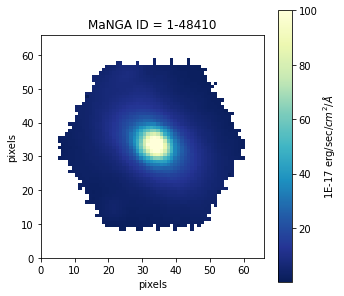

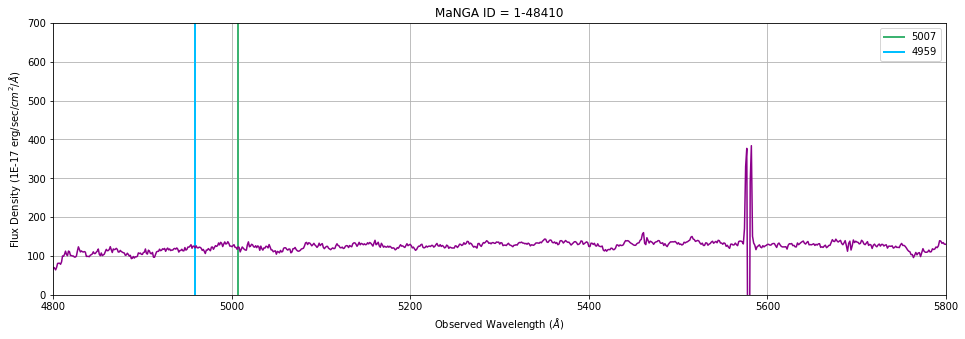

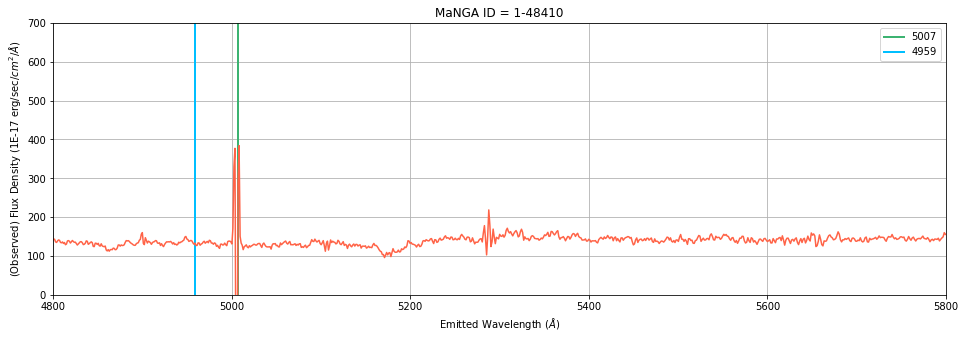

In [59]:
num = 33
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [60]:
# > 1 objects
# num = 34
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

In [61]:
# > 1 objects 
# num = 35
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

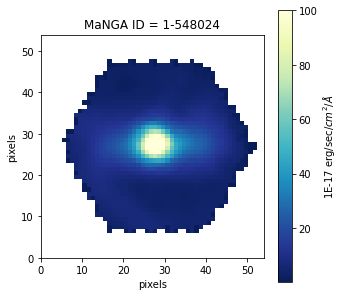

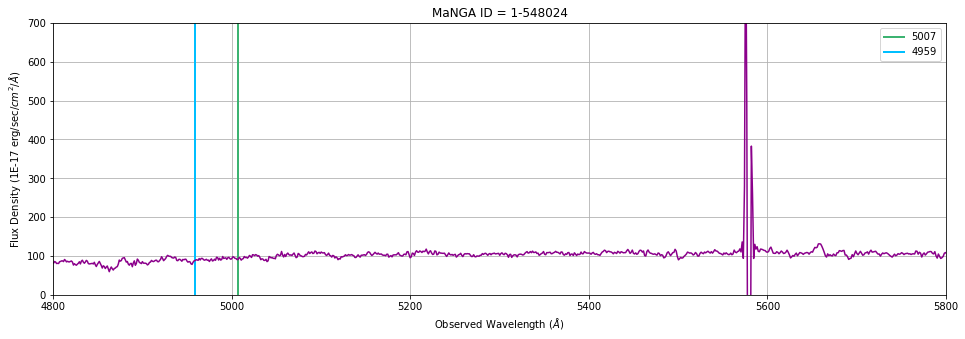

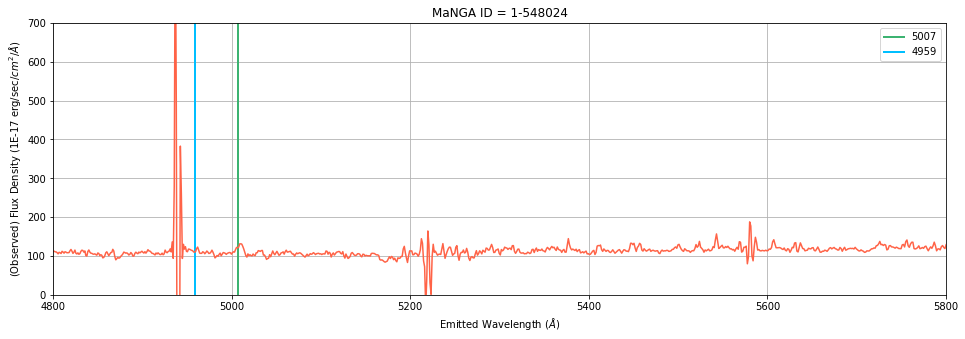

In [62]:
num = 36
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

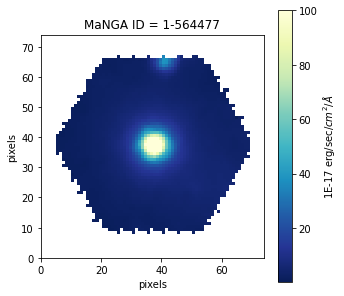

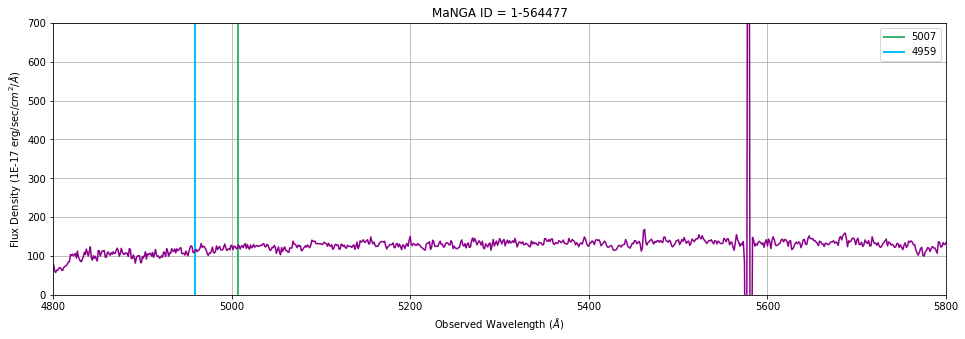

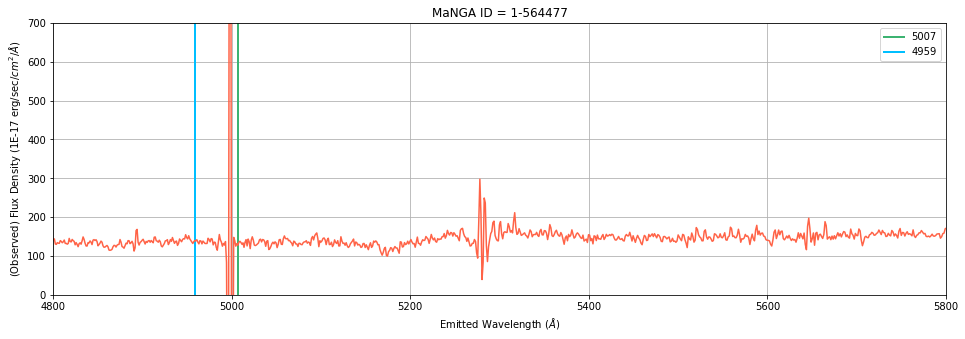

In [63]:
# > 1 objects (but the second object is so close to the edge)
num = 37
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [64]:
# > 1 objects
# num = 38
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

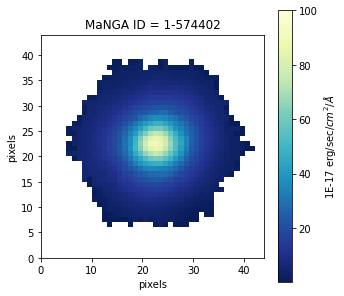

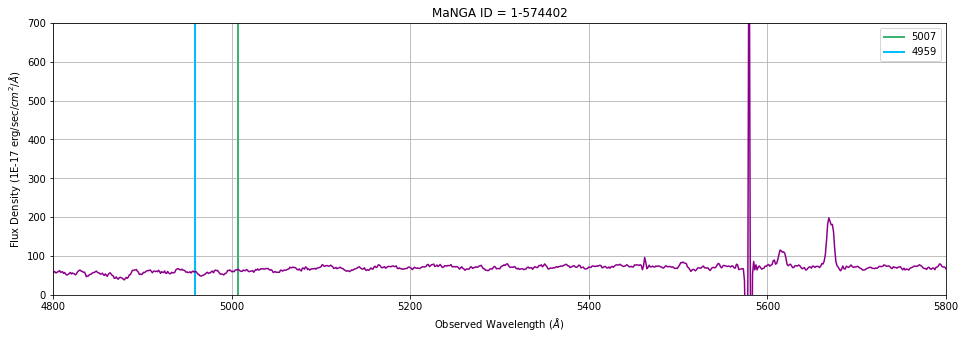

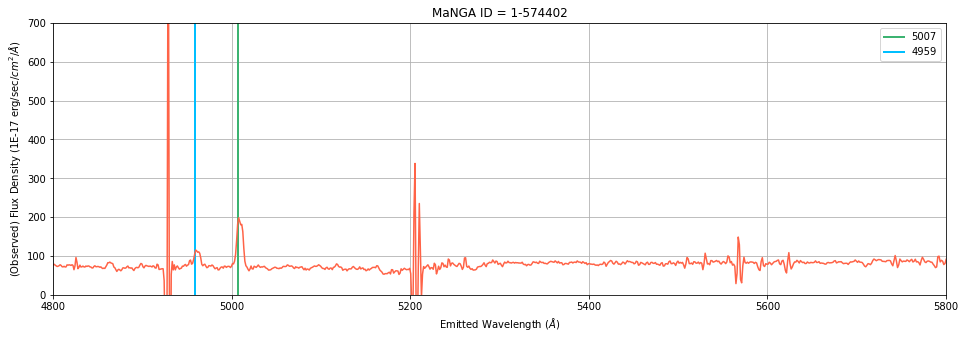

In [65]:
num = 39
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [66]:
# > 1 objects 
# num = 40
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

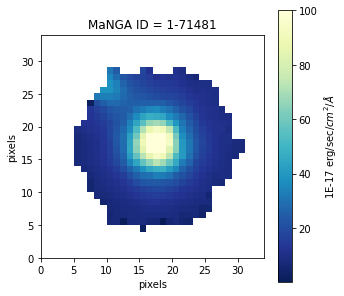

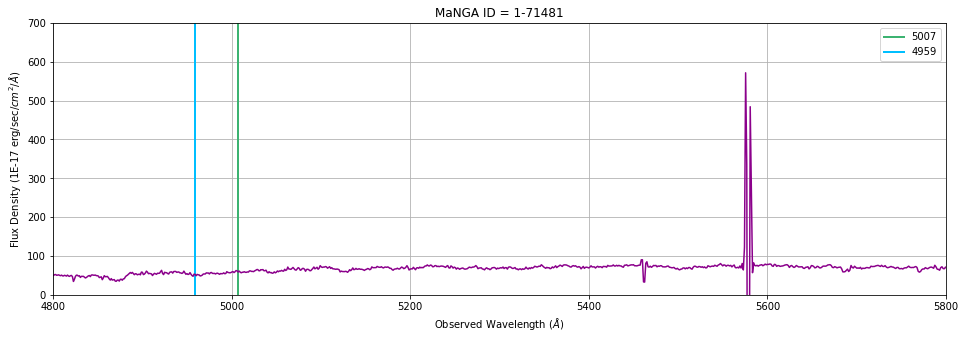

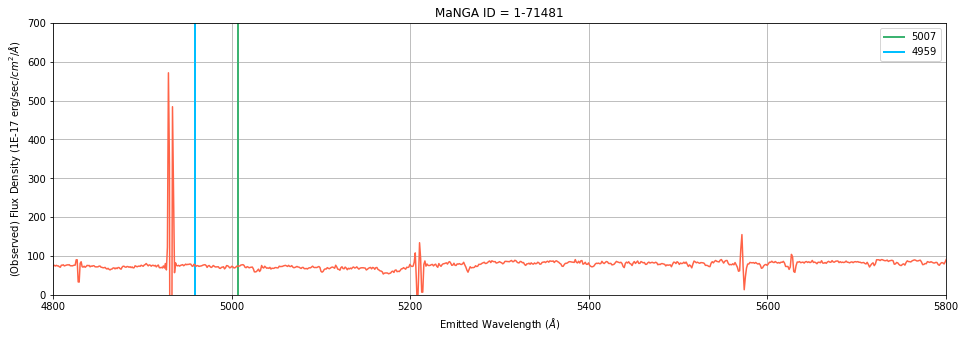

In [67]:
# > 1 objects (the second object is on the edge, and can only be seen partially)
num = 41
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

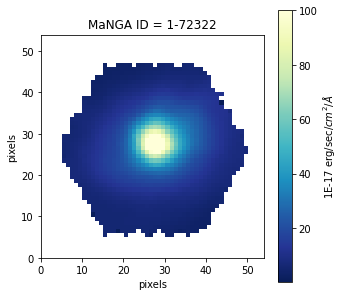

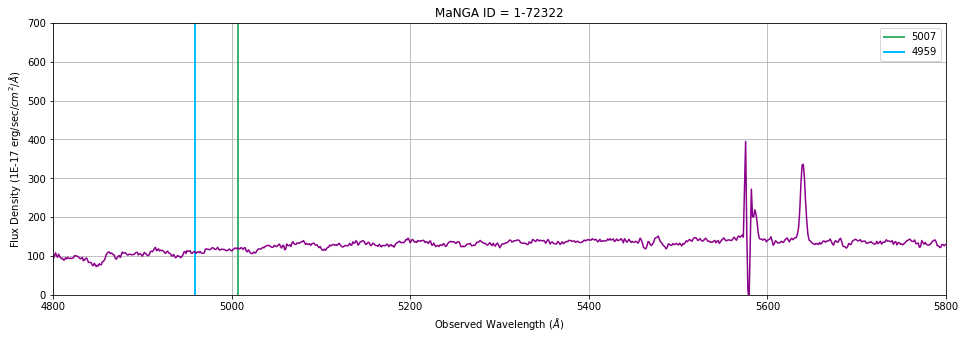

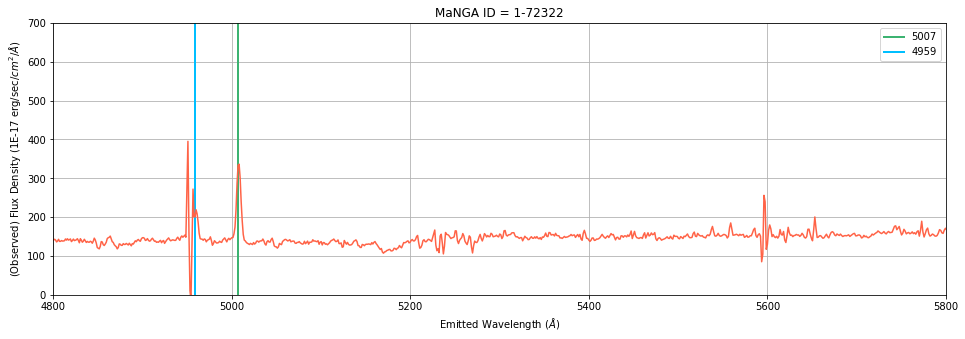

In [68]:
num = 42
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

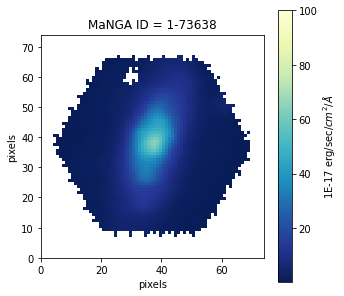

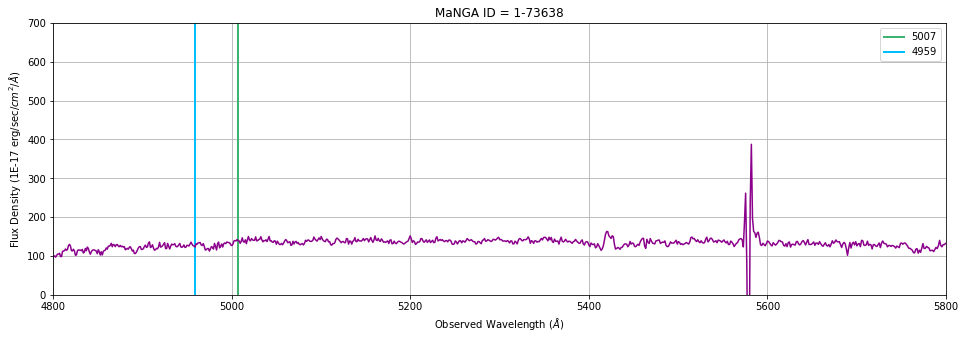

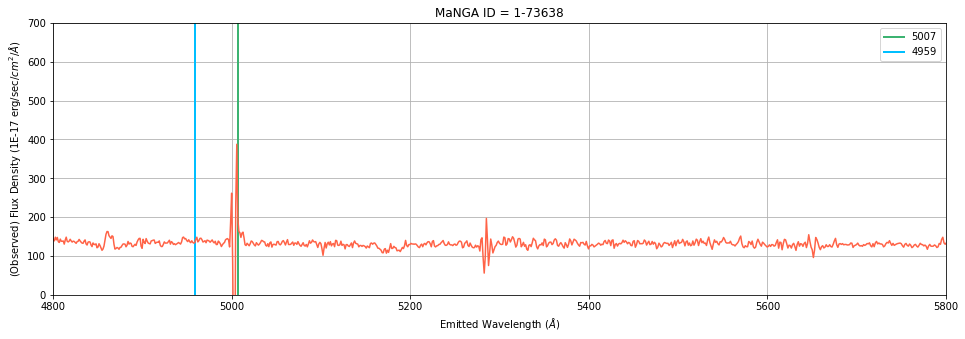

In [69]:
num = 43
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [70]:
# > 1 objects
# num = 44
# imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
#                ,df.loc[[num]]['nsa_z'][num])
# fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
#               df.loc[[num]]['nsa_z'][num])

In [71]:
plateifu['1-22948']

['7992-9102']

In [72]:
num13 = fits.open('/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-7992-9102-LOGCUBE.fits.gz')

In [73]:
# num13['FLUX'].header

In [74]:
wave13 = num13['WAVE'].data

In [75]:
flux13 = np.transpose(num13['FLUX'].data, axes = (2, 1, 0))

In [76]:
mask13 = np.transpose(num13['MASK'].data, axes = (2, 1, 0))

In [77]:
len(flux13), len(flux13[0]), len(flux13[0][0])

(64, 64, 4563)

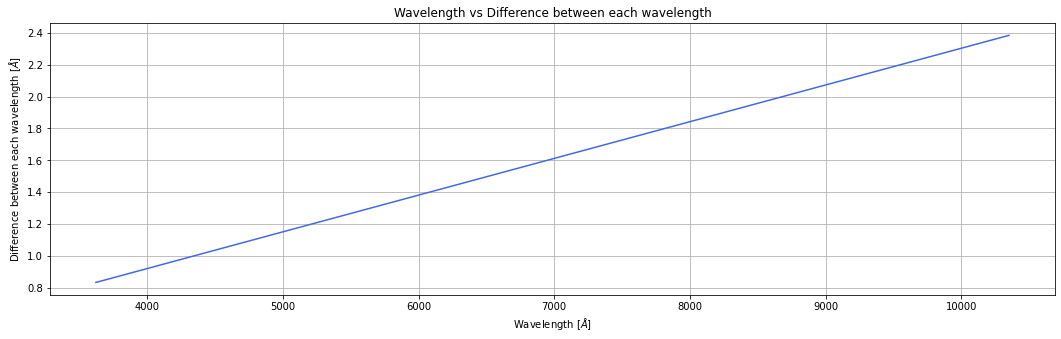

In [78]:
difference = [] 
for i in range(1, len(wave13)):
    difference.append(wave13[i] - wave13[i-1])
# len(difference)
plt.figure(figsize = (18,5))
plt.grid()
plt.xlabel("Wavelength " + r'[$\AA$]')
plt.ylabel('Difference between each wavelength ' + r'[$\AA$]')
plt.title("Wavelength vs Difference between each wavelength")
plt.plot(wave13[:-1], difference, color = 'royalblue')
# plt.savefig('Images/wavelength_vs_difference')

# ------------------------------------------------------------------------

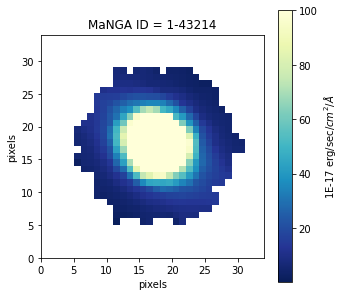

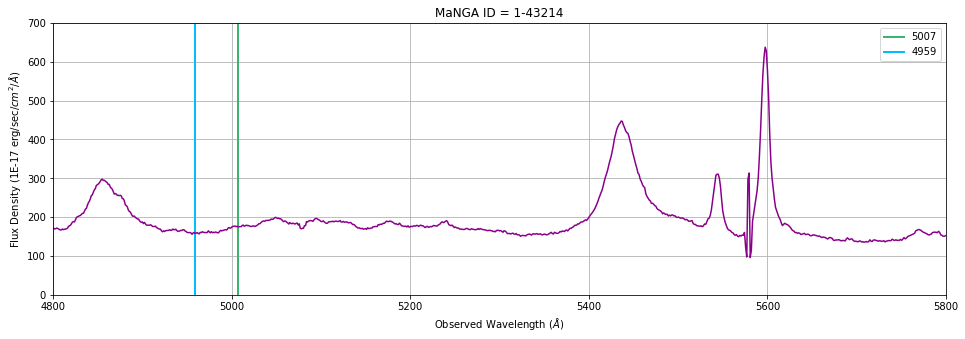

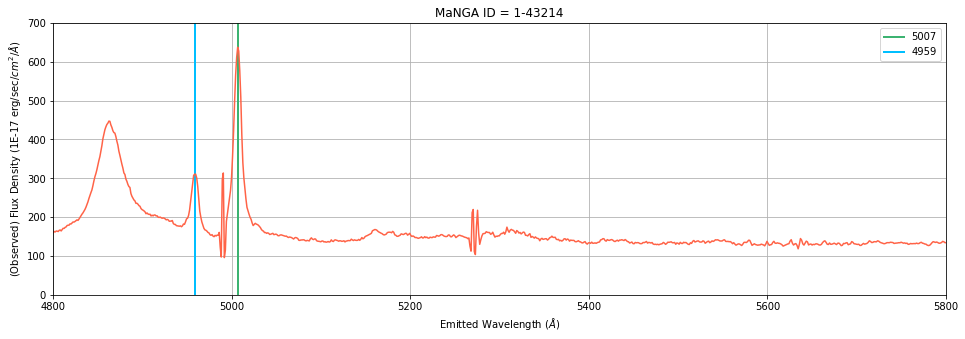

In [79]:
num = 32
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])
fluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [80]:
plateifu[df.loc[[32]]['mangaid'][32]]

['8135-1902']

In [81]:
# obj32 = fits.open('/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-8135-1902-LOGCUBE.fits.gz')
obj32 = fits.open('/Users/natachaupra/Downloads/manga-8135-1902-LOGCUBE.fits.gz')

In [82]:
flux32 = np.transpose(obj32['FLUX'].data, axes = (2,1,0))

In [83]:
mask32 = np.transpose(obj32['MASK'].data, axes = (2,1,0))

In [84]:
wave32 = obj32['WAVE'].data

In [85]:
length32 = len(flux32)

sumflux32 = np.zeros(4563)

for i in range(length32):
    for j in range(length32):
        sumflux32 = np.add(sumflux32, flux32[i,j])

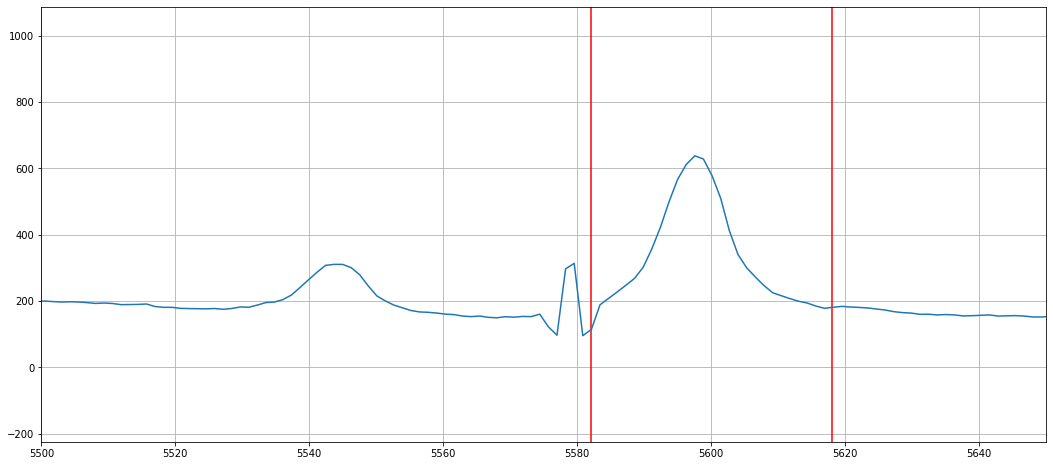

In [86]:
plt.figure(figsize = (18,8))
plt.grid()
plt.xlim(5500,5650)
plt.axvline(5582, color = 'red')
plt.axvline(5618, color = 'red')
plt.plot(wave32, sumflux32)

#### Now the formula I'm using only uses 5007 and I have absolutely no idea where to cut the graph to only get the 5007 peak without letting in the values from the other peaks - so ofc, Imma guess hehe 

In [87]:
ivar32 = np.transpose(obj32['IVAR'].data, axes = (2,1,0))

In [88]:
wavelength32 = np.where(np.logical_and(wave32 > 5582, wave32 < 5618))[0]
wavelength32, len(wavelength32)

(array([1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
        1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900,
        1901, 1902, 1903, 1904, 1905, 1906]),
 28)

In [89]:
flux_compare32 = [] 
ivar_compare32 = []

for i in wavelength32:
    flux_compare32.append(flux32[:,:,i].flatten())
    ivar_compare32.append(ivar32[:,:,i].flatten())

flux_compare32 = np.array(flux_compare32)
ivar_compare32 = np.array(ivar_compare32)

flux_compare32, ivar_compare32, len(flux_compare32[0]), len(ivar_compare32)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 1156,
 28)

In [90]:
length32**2

1156

In [91]:
result32 = []
sumresult32 = []

for i in range(len(wavelength32)):
    for j in range(length32**2):
        sigma = np.sqrt(1 / ivar_compare32[i][j]) if ivar_compare32[i][j] != 0 else 0
        
        if flux_compare32[i][j] < (3 * sigma):
            result32.append(0)
        else:
            result32.append(flux_compare32[i][j])
    sumresult32.append(np.sum(result32))
    result32 = []

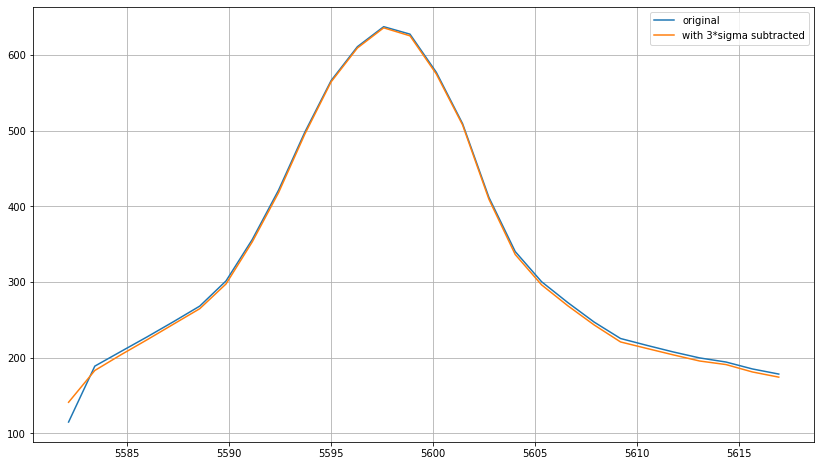

In [92]:
plt.figure(figsize = (14,8))
plt.grid()
plt.plot(wave32[wavelength32[0] : wavelength32[-1] + 1], sumflux32[wavelength32[0] : wavelength32[-1] + 1],
        label = 'original')
plt.plot(wave32[wavelength32[0] : wavelength32[-1] + 1], sumresult32, label = 'with 3*sigma subtracted')
plt.legend()

In [93]:
redshift32 = df.loc[[32]]['nsa_z'][32]
redshift32

0.117997

In [94]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

In [95]:
luminosity_distance32 = Mpc_to_cm(549.6) # in cm
luminosity_distance32

1.695889728e+27

In [96]:
dlambda32 = np.array([])

for i in range(wavelength32[1], wavelength32[-1]+1):
    dlambda32 = np.append(dlambda32, wave32[i] - wave32[i-1])

# dlambda32

$$ L = 4\pi d^2 \int^{\lambda_2}_{\lambda_1} f_\lambda d\lambda$$

In [97]:
flmd_dlmd32 = np.sum(sumresult32[0:-1] * dlambda32)

In [98]:
flmd_dlmd32 # huh?????? 10k ? seriously ? 

11735.357318775299

In [99]:
def luminosity_calc(luminosity_distance, flmd_dlmd):
    return 4 * np.pi * (luminosity_distance**2) * flmd_dlmd * (1e-17)

In [100]:
luminosity32 = luminosity_calc(luminosity_distance32, flmd_dlmd32)
print(luminosity32, ('erg/s (?)')) # Why is the value so high -.-

4.2413235204149866e+42 erg/s (?)


In [101]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

In [102]:
def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

In [105]:
print('M_BH / M_sol =',BH_calc(luminosity32))
print('log(luminosity) =',np.log10(luminosity32))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity32)))
print('log(luminosity / sol_lum) =', np.log10(luminosity32 / sol_luminosity))

M_BH / M_sol = 107589095.30116782
log(luminosity) = 42.627501400913424
log(M_BH / M_sol) = 8.031768255619193
log(luminosity / sol_lum) = 9.042492121010966
